In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

curr_file = pd.read_csv("flight_delays.csv")
curr_file

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


Share of all departure delays

share_of_delays = 0.19044
amount of inTime = 80956
amount of delayed = 19044


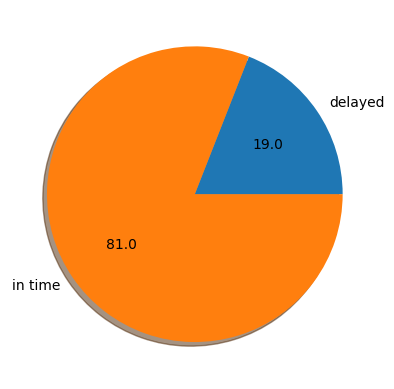

In [2]:
amount_of_delayed = 0
amount_of_inTime = 0
for item in curr_file['dep_delayed_15min']:
    if item == "Y":
        amount_of_delayed += 1
amount_of_inTime = len(curr_file['dep_delayed_15min']) - amount_of_delayed

share_of_delays = amount_of_delayed/len(curr_file['dep_delayed_15min'])
print(f"share_of_delays = {share_of_delays}")
print(f"amount of inTime = {amount_of_inTime}\namount of delayed = {amount_of_delayed}")

schedule1 = plt.pie([amount_of_delayed, amount_of_inTime], labels = ['delayed', 'in time'], autopct='%.1f', shadow=True)

first distribution
delayed_to_distance_fractures = [2.480e+02 1.409e+03 2.348e+03 2.216e+03 1.861e+03 1.770e+03 1.662e+03
 1.112e+03 1.046e+03 1.088e+03 9.340e+02 5.080e+02 3.480e+02 2.680e+02
 3.290e+02 3.460e+02 1.630e+02 2.900e+02 1.690e+02 1.720e+02 6.400e+01
 1.360e+02 9.700e+01 8.900e+01 1.820e+02 1.110e+02 3.400e+01 1.400e+01
 2.000e+00 6.000e+00 1.000e+00 0.000e+00 1.000e+00 3.000e+00 0.000e+00
 0.000e+00 0.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 2.000e+00
 4.000e+00 0.000e+00 5.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00
 2.000e+00 0.000e+00]
last distribution
delayed_to_distance_fractures = [0.00248 0.01657 0.04005 0.06221 0.08082 0.09852 0.11514 0.12626 0.13672
 0.1476  0.15694 0.16202 0.1655  0.16818 0.17147 0.17493 0.17656 0.17946
 0.18115 0.18287 0.18351 0.18487 0.18584 0.18673 0.18855 0.18966 0.19
 0.19014 0.19016 0.19022 0.19023 0.19023 0.19024 0.19027 0.19027 0.19027
 0.19027 0.19029 0.19029 0.19029 0.19029 0.19031 0.19035 0.19035 0.1904
 0.19042 0.19042 0.

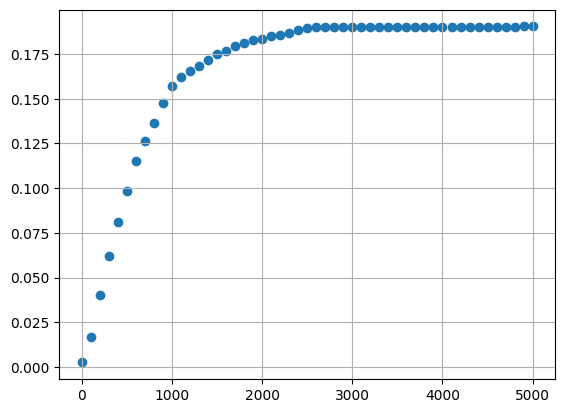

In [3]:
distance_fractures = np.linspace(0, (max(curr_file['Distance'])//100+1)*100, (max(curr_file['Distance']))//100 + 2)

delayed_to_distance_fractures = np.zeros(len(distance_fractures))
#sorted_delays = (curr_file['Distance']).sort_values()

for i in range(len(curr_file['Distance'])):
    if curr_file['dep_delayed_15min'][i] == 'Y':
        delayed_to_distance_fractures[curr_file['Distance'][i]//100] += 1
print(f"first distribution\ndelayed_to_distance_fractures = {delayed_to_distance_fractures}")
for i in range(1, len(delayed_to_distance_fractures), 1):
    delayed_to_distance_fractures[i] += delayed_to_distance_fractures[i-1]
delayed_to_distance_fractures /= 100000
print(f"last distribution\ndelayed_to_distance_fractures = {delayed_to_distance_fractures}")

schedule2 = plt.scatter(distance_fractures, delayed_to_distance_fractures, label='line_1')
plt.grid(True)
plt.show(True)

<AxesSubplot: xlabel='Dest'>

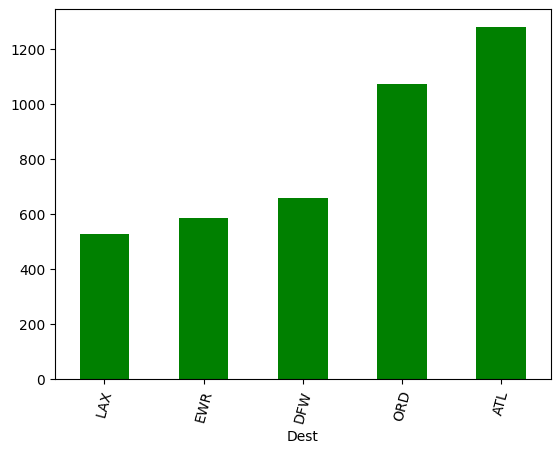

In [85]:
destination_sorted_delayed = pd.Series(curr_file[curr_file['dep_delayed_15min'] == 'Y'].groupby('Dest').count()['dep_delayed_15min'].sort_values())
destination_top_delayed = destination_sorted_delayed.tail(5)

destination_top_delayed.plot(kind='bar', rot=75, color='green')

# distribution of delays by months

<AxesSubplot: >

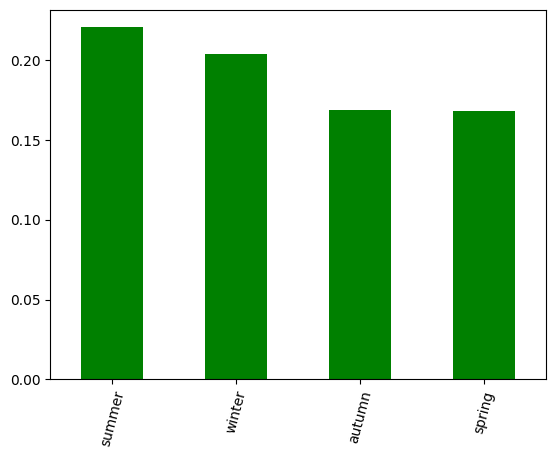

In [83]:
winter_months = ['c-1', 'c-2', 'c-12']
spring_months = ['c-3', 'c-4', 'c-5']
summer_months = ['c-6', 'c-7', 'c-8']
autumn_months = ['c-9', 'c-10', 'c-11']

winter_dataArr = []
spring_dataArr = []
summer_dataArr = []
autumn_dataArr = []

winter_departures = 0
spring_departures = 0
summer_departures = 0
autumn_departures = 0

for i in range(len(curr_file['dep_delayed_15min'])):
    if curr_file['Month'][i] in winter_months:
        winter_departures += 1
        if curr_file['dep_delayed_15min'][i] == "Y":
            winter_dataArr.append(i)
    elif curr_file['Month'][i] in spring_months:
        spring_departures += 1
        if curr_file['dep_delayed_15min'][i] == "Y":
            spring_dataArr.append(i)
    elif curr_file['Month'][i] in summer_months:
        summer_departures += 1
        if curr_file['dep_delayed_15min'][i] == "Y":
            summer_dataArr.append(i)
    elif curr_file['Month'][i] in autumn_months:
        autumn_departures += 1
        if curr_file['dep_delayed_15min'][i] == "Y":
            autumn_dataArr.append(i)



#curr_file[curr_file['dep_delayed_15min'] == 'Y']["Month"].value_counts()
season_delayed = pd.Series([len(winter_dataArr)/winter_departures, len(spring_dataArr)/spring_departures, len(summer_dataArr)/summer_departures, 
                            len(autumn_dataArr)/autumn_departures], index=['winter', 'spring', 'summer', 'autumn'])
season_delayed = season_delayed.sort_values(ascending=False)
season_delayed.plot(kind='bar', rot=75, color='green')

# top 10 airlines who rerely delay their flights

<AxesSubplot: xlabel='UniqueCarrier'>

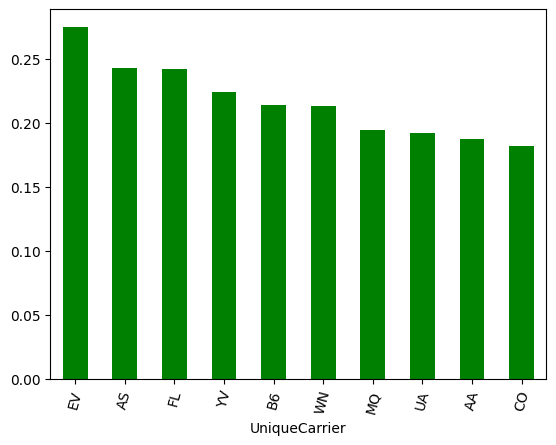

In [82]:
airlines_delay_top10 = (curr_file[curr_file['dep_delayed_15min'] == 'Y'].groupby("UniqueCarrier").count()['dep_delayed_15min']/
                  curr_file.groupby("UniqueCarrier").count()['dep_delayed_15min']).sort_values(ascending=False).head(10)

airlines_delay_top10.plot(kind='bar', rot=75, color='green')

# top 10 wort airport, where delays often happen

269
289


<AxesSubplot: xlabel='Origin'>

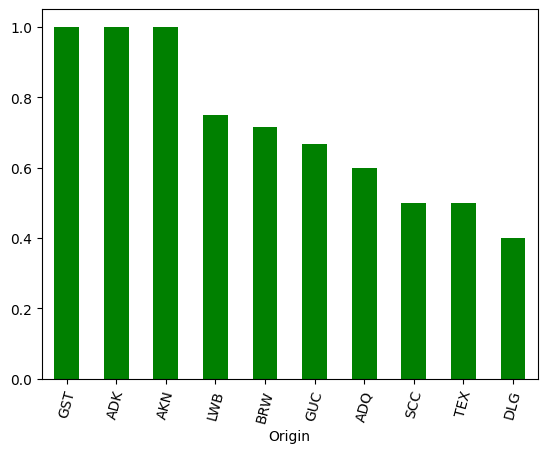

In [81]:
airports_departures = curr_file.groupby("Origin").Dest.count()
airports_delay = curr_file.loc[curr_file['dep_delayed_15min'] == 'Y'].groupby("Origin").Dest.count()


print(len(airports_delay))
print(len(airports_departures))

airports_delay_top10 = (airports_delay/airports_departures).sort_values(ascending=False).head(10)

airports_delay_top10.plot(kind='bar', rot=75, color='green')